**Import Necessary Libraries**

In [14]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import time
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Data Preparation and Exploration

In [2]:
df = pd.read_csv("milk_quality_data.csv")
print("Number of rows and columns:", df.shape)
print("First few rows of the dataset:")
df.head()

Number of rows and columns: (1059, 8)
First few rows of the dataset:


,ph,temperature,taste,odor,fat,turbidity,colour,grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [3]:
print("Missing values in the dataset:")
print(df.isna().sum())

Missing values in the dataset:
ph             0
temperature    0
taste          0
odor           0
fat            0
turbidity      0
colour         0
grade          0
dtype: int64


In [4]:
df['grade']= df['grade'].map({'low':0,'medium':1,'high':2})

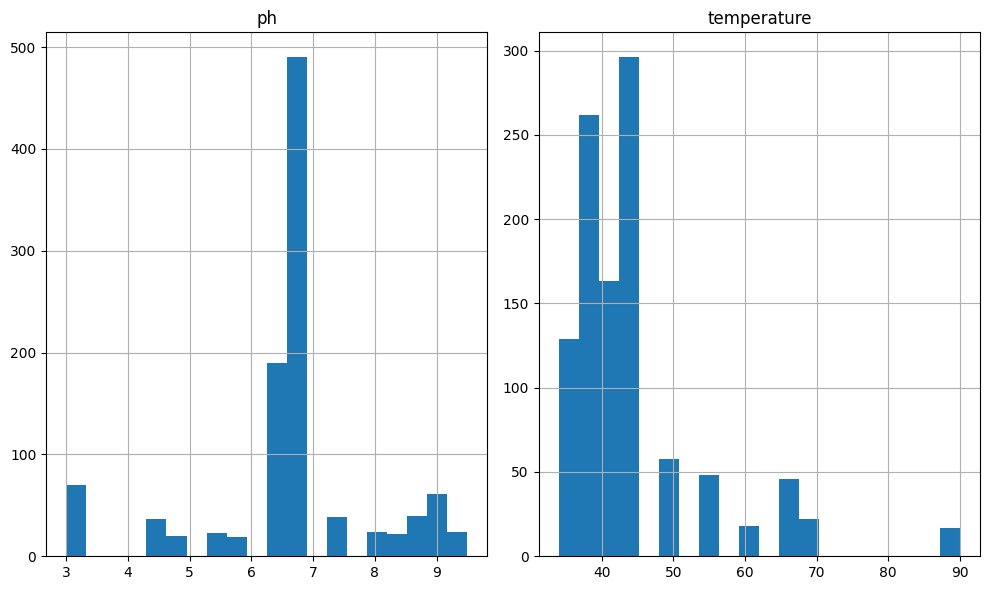

In [5]:
df[['ph', 'temperature']].hist(bins=20, figsize=(10, 6))
plt.tight_layout()
plt.show()


### Model Training Using Basic Models



In [6]:

X = df[['ph', 'temperature', 'taste', 'odor', 'fat', 'turbidity', 'colour']]
y = df['grade']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [7]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

logistic_pred = logistic_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, logistic_pred))


Logistic Regression Accuracy: 0.6981132075471698


In [8]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

tree_pred = tree_model.predict(X_test)
print("Decision Tree Classifier Accuracy:", accuracy_score(y_test, tree_pred))

Decision Tree Classifier Accuracy: 0.9937106918238994


###  Model Training Using Advanced Models



In [9]:
gb_model = GradientBoostingClassifier(n_estimators=50)
gb_model.fit(X_train, y_train)

gb_pred = gb_model.predict(X_test)
print("Gradient Boosting Classifier Accuracy:", accuracy_score(y_test, gb_pred))

Gradient Boosting Classifier Accuracy: 0.9905660377358491


In [10]:
xgb_model = XGBClassifier(n_estimators=50, use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)

xgb_pred = xgb_model.predict(X_test)
print("XGBoost Classifier Accuracy:", accuracy_score(y_test, xgb_pred))

XGBoost Classifier Accuracy: 0.9968553459119497


### Experiment with Hyperparameters in XGBoost

In [11]:
xgb_model_hyper = XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, colsample_bytree=0.5)
xgb_model_hyper.fit(X_train, y_train)


xgb_hyper_pred = xgb_model_hyper.predict(X_test)
print("XGBoost Classifier (Hyperparameters) Accuracy:", accuracy_score(y_test, xgb_hyper_pred))


XGBoost Classifier (Hyperparameters) Accuracy: 0.9968553459119497


In [12]:
print("Classification Report:")
print(classification_report(y_test, xgb_hyper_pred))

print('*' * 50)

print("Confusion Matrix:")
print(confusion_matrix(y_test, xgb_hyper_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       115
           1       0.99      1.00      1.00       127
           2       1.00      1.00      1.00        76

    accuracy                           1.00       318
   macro avg       1.00      1.00      1.00       318
weighted avg       1.00      1.00      1.00       318

**************************************************
Confusion Matrix:
[[114   1   0]
 [  0 127   0]
 [  0   0  76]]


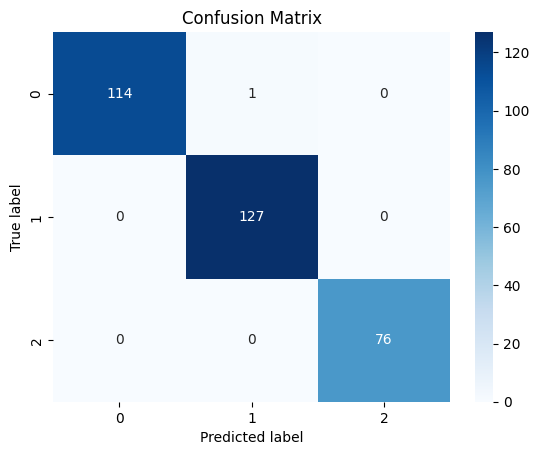

In [15]:
cf= confusion_matrix(y_test,xgb_hyper_pred)
sns.heatmap(cf,fmt='d',annot=True,cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()